DSCI100 Final Project - Group 22

# Can Age and Experience Level Predict Hours Played in the Players Dataset?

By Vanessa Mah 76858182, Jeya Cheema 68791771, Xiaowen Hu 77277085 & Amy Huang 45064565


## (1) Introduction 

At the University of British Columbia, a Computer Science research group led by Dr. Frank Wood is studying how people play video games in realistic environments. To support this research, the team developed a custom Minecraft server called PLAICraft, which automatically records players' actions as they move through the virtual environment. These data allow researchers to study behaviour patterns, decision making, and skill development.

However, running this type of data collection project requires careful planning. Server performance, data storage capacity, and software infrastructure all come with financial costs and depend heavily on how many people join the server and how long they play. To manage resources responsibly, the research group needs to understand which kinds of players tend to contribute the most data so they can focus their recruitment efforts on those groups. This leads to the central question of the project: **Can Age and Experience Predict Hours played in the Players Dataset?**

The dataset used to answer this question is the `players` dataset, which provides insights into a group of players, including their experience level, subscription status, hours played, name, gender, and age. A summary of the variables is shown below.

### Dataset Overview

The `players` dataset contains 196 observations and 7 variables. 

#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |

There are a few issues in the dataset that need to be addressed for more accurate analysis. In this case, we focus on three main problems:

- **Missing values**: The `Age` variable contains missing values for at least one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Misclassification of variables**: The `experience` variable should be converted to a factor because it represents categorical data, but it is currently stored as a character.
  
#### How the Data Were Collected
The dataset was collected from the PLAICraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.




## (2) Methods & Results 

To answer our specific question, we only used the `Age`, `experience`, and `played_hours` variables from the `players` dataset to predict player engagement.

- **We used KNN regression to explore the relationship between `Age` and `played_hours`.**

- **We used KNN classification to explore the relationship between `experience` and `played_hours`.**

We began by installing and loading the required packages for data manipulation.

In [1]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `players.csv` dataset file was loaded into R using the `read.csv()` function.

In [2]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100-group-project/refs/heads/main/players.csv"
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


We also performed summary statistics for the variables we are interested in.

In [3]:
Summary_players <- list(
    columns_count = ncol(players),
    observations_count = nrow(players),
    column_names = names(players),
    AGE = list(
        Quartiles = quantile(players$Age, na.rm = TRUE),
        NA_count = sum(is.na(players$Age)),
        Max = max(players$Age, na.rm = TRUE),
        Min = min(players$Age, na.rm = TRUE),
        Mean = mean(players$Age, na.rm = TRUE),
        Median = median(players$Age, na.rm = TRUE),
        Standard_Deviation = sd(players$Age, na.rm = TRUE),
        Range = range(players$Age, na.rm = TRUE)),
    Played_Hours = list(
        Quartiles = quantile(players$played_hours),
        NA_count = sum(is.na(players$played_hours)),
        Max = max(players$played_hours),
        Min = min(players$played_hours),
        Mean = mean(players$played_hours),
        Median = median(players$played_hours),
        Standard_Deviation = sd(players$played_hours),
        Range = range(players$played_hours)))

experience_table <- table(players$experience)
experience_percentages <- prop.table(experience_table) * 100

Experience <- list(
    Experience_Frequency = experience_table,
    Experience_Percentages = experience_percentages)

Summary_players
Experience

$columns_count
[1] 7

$observations_count
[1] 196

$column_names
[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"         

$AGE
$AGE$Quartiles
   0%   25%   50%   75%  100% 
 9.00 17.00 19.00 22.75 58.00 

$AGE$NA_count
[1] 2

$AGE$Max
[1] 58

$AGE$Min
[1] 9

$AGE$Mean
[1] 21.13918

$AGE$Median
[1] 19

$AGE$Standard_Deviation
[1] 7.389687

$AGE$Range
[1]  9 58


$Played_Hours
$Played_Hours$Quartiles
   0%   25%   50%   75%  100% 
  0.0   0.0   0.1   0.6 223.1 

$Played_Hours$NA_count
[1] 0

$Played_Hours$Max
[1] 223.1

$Played_Hours$Min
[1] 0

$Played_Hours$Mean
[1] 5.845918

$Played_Hours$Median
[1] 0.1

$Played_Hours$Standard_Deviation
[1] 28.35734

$Played_Hours$Range
[1]   0.0 223.1

$Experience_Frequency

 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

$Experience_Percentages

  Amateur  Beginner       Pro   Regular   Veteran 
32.142857 17.857143  7.142857 18.367347 24.489796 


Summary Statistics Results (described in words):
- The dataset includes players aged between 9 and 58 years, with an average age of 21.14 years, a median of 19 years, and a standard deviation of 7.39. The age quartiles are 17 (Q1), 19 (Q2), and 22.75 (Q3). There are also 2 missing values in the `age` column.

- The total hours played vary widely from 0 to 223.1 hours, with a mean of 5.85 hours, a median of 0.1 hours, and a standard deviation of 28.36.

- The majority of players are at the Amateur level (32.14%), followed by Veterans (24.49%), Regulars (18.37%), and Beginners (17.86%).

Before beginning the analysis, a few formatting steps were required:
- Converted `experience` variable into a factor so R treats it as a categorical variable
- Removed the missing values in `Age` 

In [4]:
players_clean <- players |>
  filter(!is.na(Age)) |>
  mutate(experience = as.factor(experience))
head(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Minimal wrangling was also applied to the dataset to transform it into a tidy format.

In [20]:
players_tidy <- players_clean |>
  select (Age, experience, played_hours) |>
  mutate(
    Age = as.integer(Age))    # age was converted to an integer to ensure all values are whole numbers
head(players_tidy)

Age,experience,played_hours
<int>,<fct>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
21,Amateur,0.7
21,Regular,0.1
17,Amateur,0.0


## (2.1) Predicting a player’s total hours played using their age

To determine whether a player’s age can predict their total hours played, we used KNN regression. This method is suitable because it works with numeric data and is less sensitive to outliers compared to linear regression.

Firstly, we created a visualization of `Age` and `played_hours`. A scatter plot was used to explore the relationship between age and hours played, with `Age` on the x-axis and `played_hours` on the y-axis, to identify any patterns and/or trends. Data points are colour-coded by players' experience level.

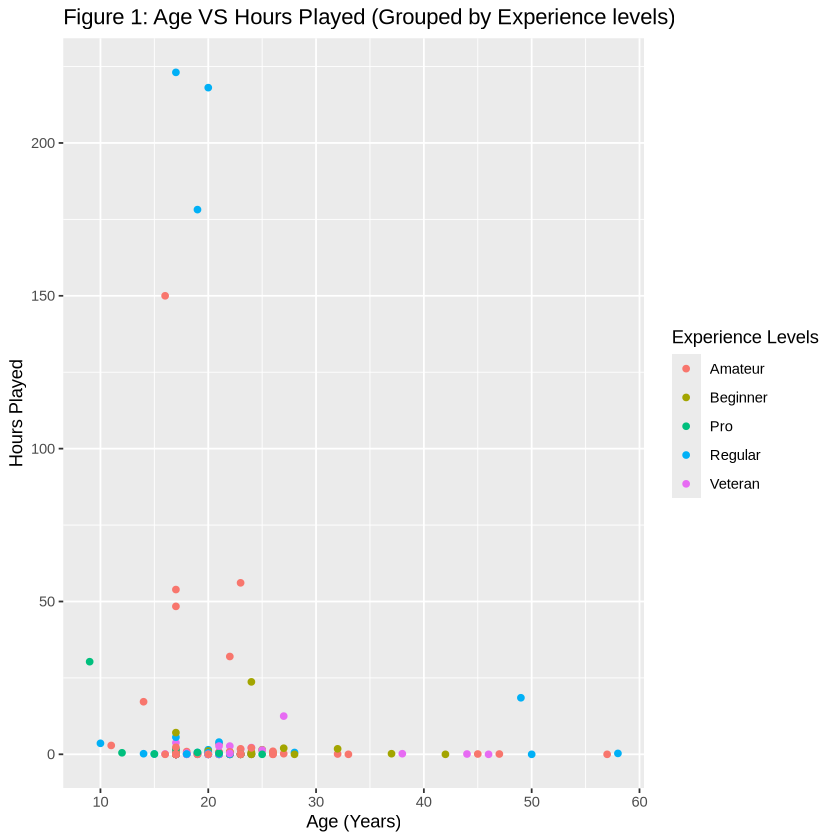

In [6]:
players_age <- players_tidy |>
  ggplot(aes(x=Age, y=played_hours, color=experience)) +
  geom_point() +
  labs(title = "Figure 1: Age VS Hours Played (Grouped by Experience levels)",
        color = "Experience Levels",
        x = "Age (Years)",
        y = "Hours Played" )
players_age

Figure 1 shows that most players are between 10 and 30 years old, with a few outliers exceeding 150 hours of playtime in the 16–20 age range. Both playtime and the number of players appear to decline after age 30.

Additionally, we can see that players with around 50 hours of playtime are generally at the Amateur experience level, while those with over 175 hours are typically at the Regular level. Playtimes below 10 hours come from players across a mix of experience levels.

We also plotted another graph to show the distribution of players by hours played.

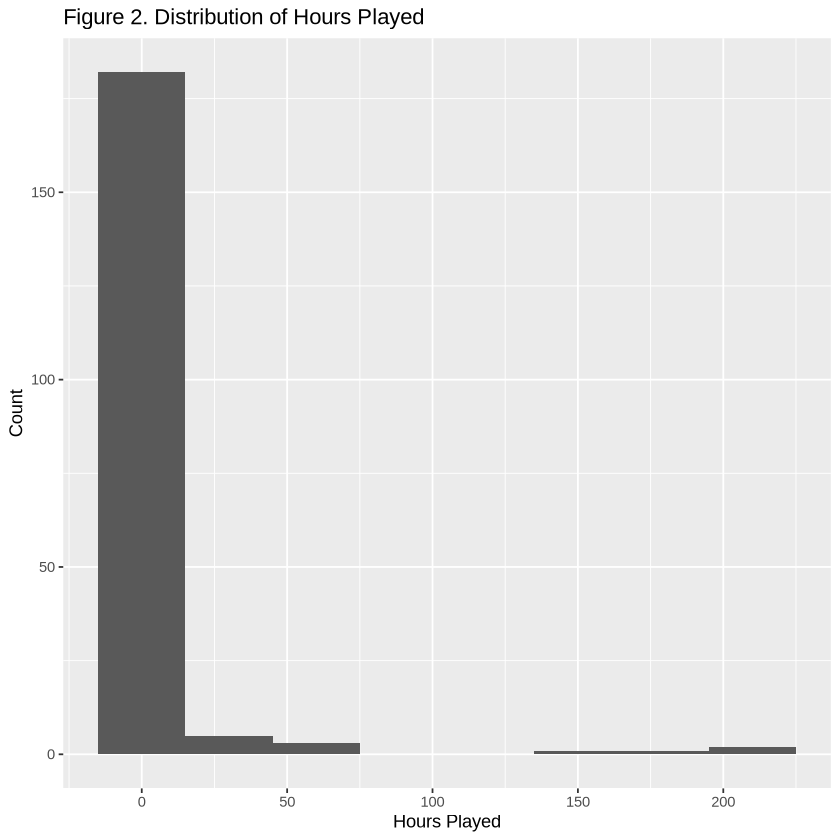

In [27]:
ggplot(players_clean, aes(x=played_hours))+
geom_histogram(binwidth=30)+
labs(x="Hours Played",
     y="Count",
     title="Figure 2. Distribution of Hours Played")

This graph shows that majority of players contribute a small number of hours, while only a small group contribute very high playtime. The distribution of hours played is right-skewed, which suggests that non-linear methods such as KNN regression may be more suitable than linear regression.

**To apply the KNN regression method, we performed the following steps:**

In [7]:
# load tidymodels package for modelling
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [8]:
set.seed(8)

# Use 75:25 split
players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
 set_engine("kknn") |>
 set_mode("regression")

players_recipe <- recipe(played_hours ~ Age, data = players_train) |>
 step_scale(all_predictors()) |>
 step_center(all_predictors())

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)
players_wkflw <- workflow() |>
 add_recipe(players_recipe) |>
 add_model(players_spec)

players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [9]:
# Find the value of K that produces the lowest RMSE
set.seed(8)

gridvals <- tibble(neighbors = seq(from = 1, to = 109, by = 3))
players_results <- players_wkflw |>
 tune_grid(resamples = players_vfold, grid = gridvals) |>
 collect_metrics()
head(players_results)

players_min <- players_results |>
 filter(.metric == "rmse") |>
slice_min(order_by = mean, n=1)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,26.037735620,5,7.873137738,Preprocessor1_Model01
1,rsq,standard,0.009142741,5,0.005828353,Preprocessor1_Model01
4,rmse,standard,29.318563513,5,7.044515901,Preprocessor1_Model02
4,rsq,standard,0.020037427,5,0.012137209,Preprocessor1_Model02
7,rmse,standard,28.402293794,5,6.882604011,Preprocessor1_Model03
7,rsq,standard,0.009768039,5,0.002500621,Preprocessor1_Model03


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
49,rmse,standard,25.80576,5,7.602932,Preprocessor1_Model17


The smallest RMSPE appears when K = 49.

In [10]:
#  Evaluating the RMSPE on the test set

k_min <- players_min |> pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
 set_engine("kknn") |>
 set_mode("regression")

players_best_fit <- workflow() |>
 add_recipe(players_recipe) |>
 add_model(players_best_spec) |>
 fit(data = players_train)

players_summary <- players_best_fit |>
 predict(players_test) |>
 bind_cols(players_test)

players_mult_summ <- metrics(players_summary, truth = played_hours, estimate = .pred) |>
                     filter(.metric == 'rmse')

players_mult_summ

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.64914


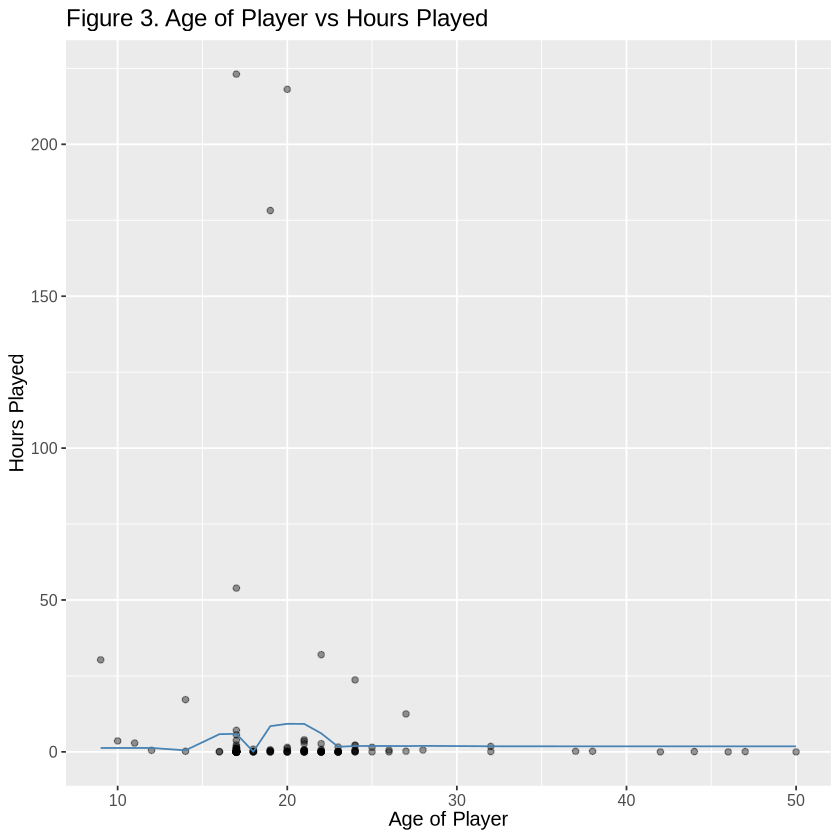

In [28]:
players_pred <- players_best_fit |>
                predict(players_train) |>
                bind_cols(players_train)

players_plot <- ggplot(players_pred, aes(x = Age, y = played_hours)) +
            geom_point(alpha = 0.4) +
            geom_line(aes(y= .pred), color = "steelblue") + 
            xlab("Age of Player") +
            ylab("Hours Played") + 
            ggtitle("Figure 3. Age of Player vs Hours Played") +
            theme(text = element_text(size = 12))

players_plot

A histogram of the total and average hours played can also clarify the relationship, as shown in the plots below.

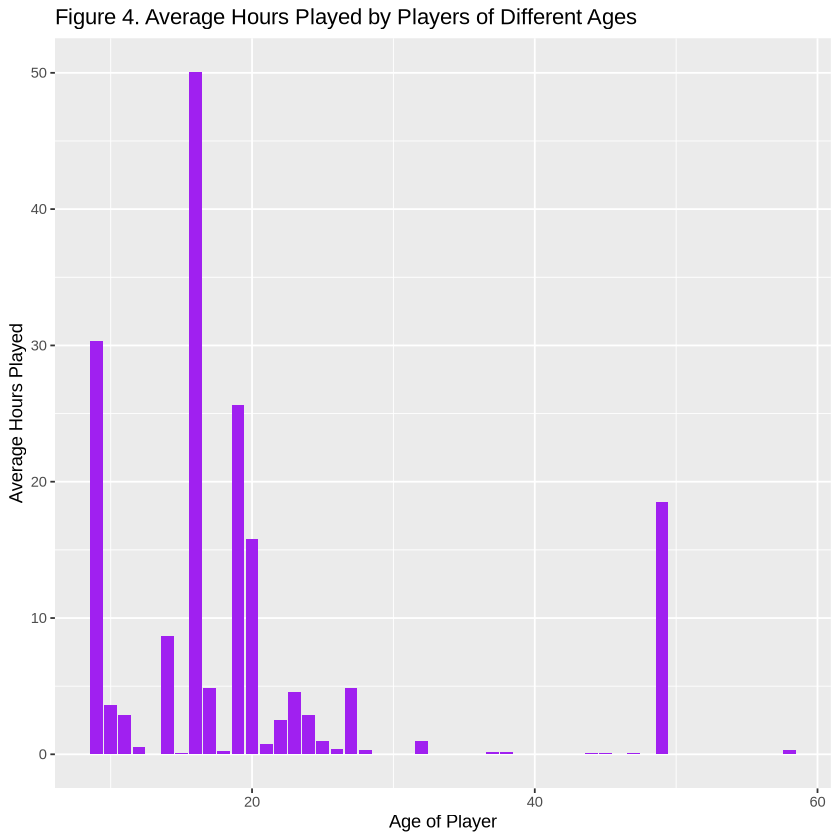

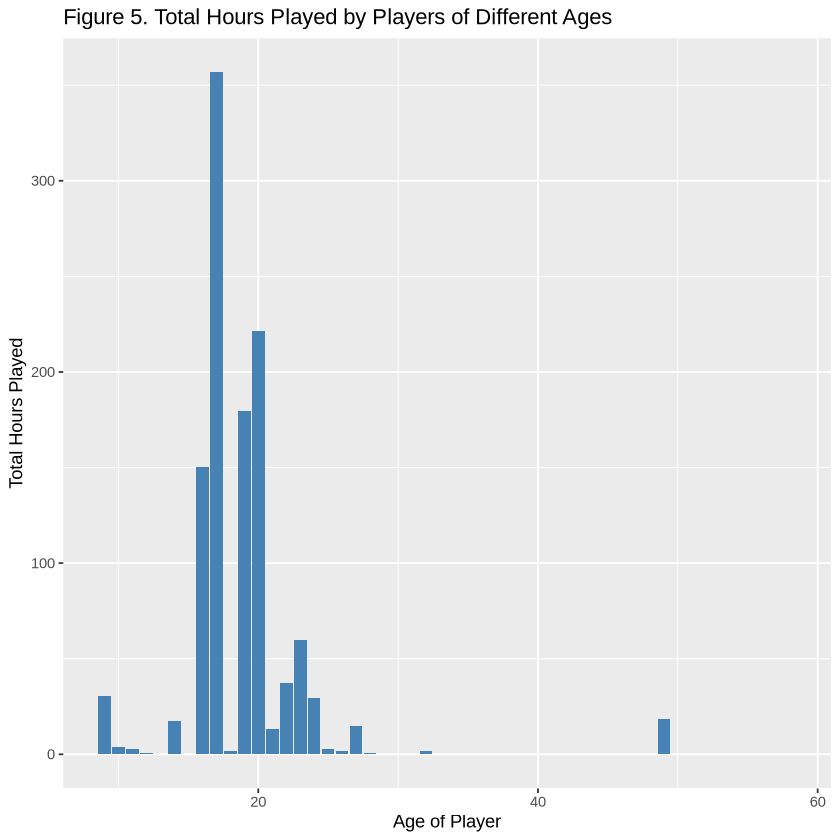

In [30]:
average_hours_vs_age <- players_tidy |>
 group_by(Age) |>
 summarize(avg_played_hrs = mean(played_hours, na.rm = TRUE))

avg_hours_age <- average_hours_vs_age |>
 ggplot(aes(x = Age, y = avg_played_hrs)) +
 geom_bar(stat = "identity", fill = "purple") +
 labs(title = "Figure 4. Average Hours Played by Players of Different Ages", x = "Age of Player", y = "Average Hours Played")
avg_hours_age


total_hours_vs_age <- players_tidy |>
 group_by(Age) |>
 summarize(total_hours = sum(played_hours, na.rm = TRUE))

total_hours_age <- total_hours_vs_age |>
 ggplot(aes(x = Age, y = total_hours)) +
 geom_bar(stat = "identity", fill = "steelblue") +
 labs(title = "Figure 5. Total Hours Played by Players of Different Ages", x = "Age of Player", y = "Total Hours Played")
total_hours_age


## (2.2) Predicting a player’s total hours played using their experience level

To investigate whether a player's experience level can predict their total hours played, we used the KNN classification method, as it can work with both categorical and numerical data.

We first created a few visualizations of `experience` and `played_hours` to examine their relationship. A boxplot was used, with `experience` on the x-axis and `played_hours` on the y-axis, to identify any patterns and/or trends.

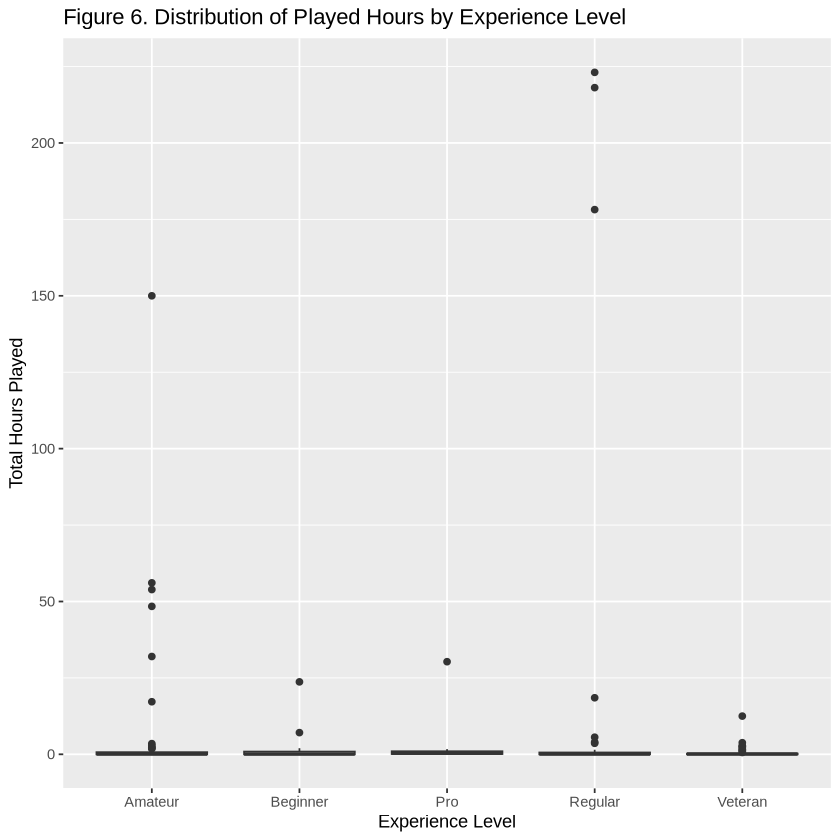

In [31]:
ggplot(players_tidy, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(y = "Total Hours Played",
       x = "Experience Level",
       title = "Figure 6. Distribution of Played Hours by Experience Level")

In Figure 6, this boxplot shows that Regular and Amateur players tend to accumulate more total hours played compared to Veteran, Pro, or Beginner players. This plot also shows us experience levels that contain outliers with unusually high total playtime. To make the comparison between experience levels and played hours even easier to visualize, we also created bar graphs.

experience,avg_played_hrs,total_hours
<fct>,<dbl>,<dbl>
Amateur,6.0174603,379.1
Beginner,1.2485714,43.7
Pro,2.7846154,36.2
Regular,18.7257143,655.4
Veteran,0.6479167,31.1


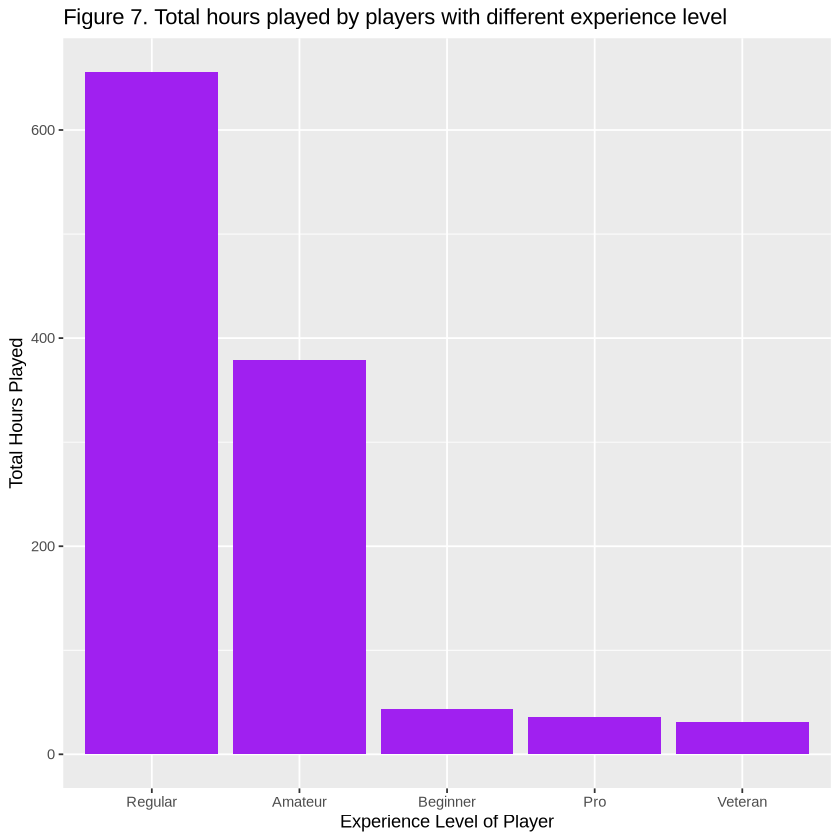

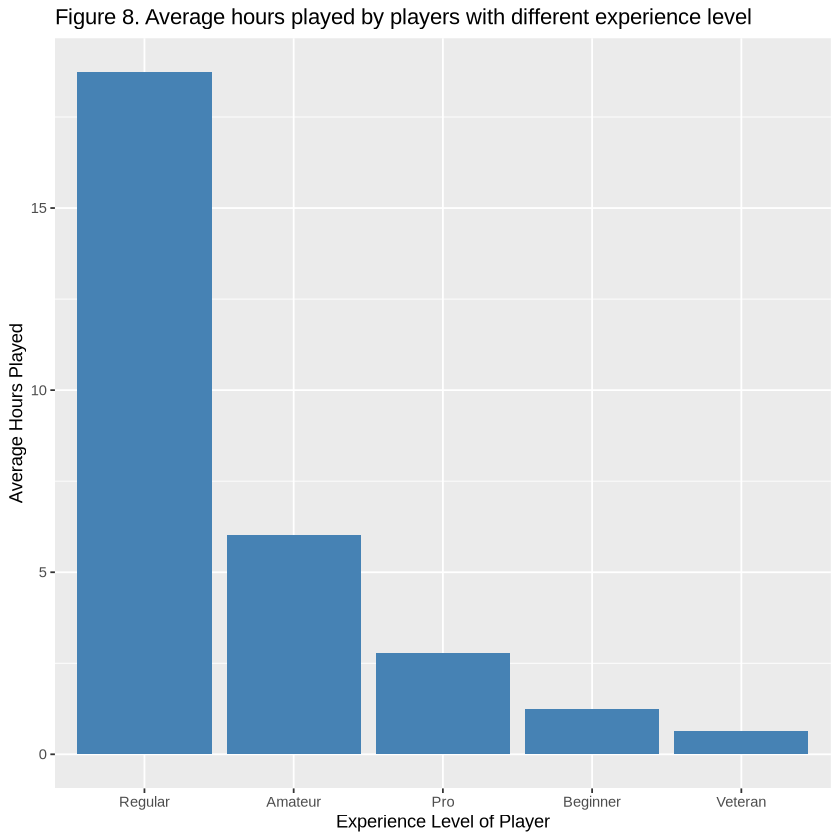

In [32]:
experience_played_hours_summarize <- players_tidy |>
            select(experience, played_hours) |>
            group_by(experience) |>
            summarize(avg_played_hrs = mean (played_hours, na.rm = TRUE),
                      total_hours = sum(played_hours, na.rm = TRUE))|>
            mutate(experience = fct_reorder(experience, total_hours, .desc = TRUE))
experience_played_hours_summarize

played_hours_experience_plot <- experience_played_hours_summarize |>
          ggplot(aes(x = experience, y = total_hours)) +
          geom_bar(stat="identity", fill = "purple") +
          labs(title = "Figure 7. Total hours played by players with different experience level",
               x = "Experience Level of Player",
               y = "Total Hours Played" )
played_hours_experience_plot


players_average_experience <- experience_played_hours_summarize |>
  mutate(experience = fct_reorder(experience, avg_played_hrs, .desc = TRUE))

avg_played_hours_experience_plot <- players_average_experience |>
          ggplot(aes(x = experience, y = avg_played_hrs)) +
          geom_bar(stat="identity", fill = "steelblue") +
          labs(title = "Figure 8. Average hours played by players with different experience level",
               x = "Experience Level of Player",
               y = "Average Hours Played" )

avg_played_hours_experience_plot

**To apply the KNN classification method, we performed the following:**

In [33]:
# use 75:25 split
set.seed(188)

player_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
player_train <- training(player_split)
player_test <- testing(player_split)

knn_recipe <- recipe(experience ~ played_hours, data = player_train) |>
 step_scale(all_predictors()) |>
 step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# for small datasets, 10-fold cross validation is preferred over 5-fold becasue it uses more data for training in each fold
knn_vfold <- vfold_cv(player_train, v = 10, strata = experience)  

gridvals <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

knn_player_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics()

head(knn_player_results)

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2680403,10,0.03830955,Preprocessor1_Model01
1,roc_auc,hand_till,0.5185417,10,0.02792055,Preprocessor1_Model01
2,accuracy,multiclass,0.2478480,10,0.03723114,Preprocessor1_Model02
2,roc_auc,hand_till,0.4931944,10,0.03372963,Preprocessor1_Model02
3,accuracy,multiclass,0.2472070,10,0.03040086,Preprocessor1_Model03
3,roc_auc,hand_till,0.4872153,10,0.03313274,Preprocessor1_Model03


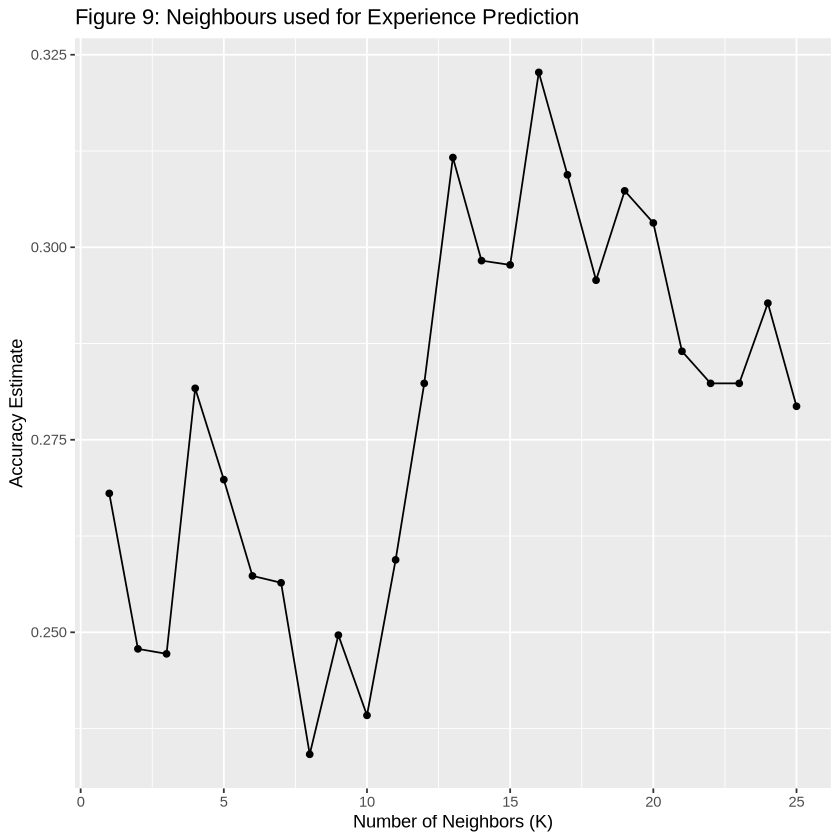

In [34]:
# To find optimal K
set.seed(188) 

accuracies <- knn_player_results |>
 filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
   geom_point() +
   geom_line() +
   labs(x = "Number of Neighbors (K)", y = "Accuracy Estimate") +
   ggtitle("Figure 9: Neighbours used for Experience Prediction")
 accuracy_versus_k

In [23]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 16

Having determined that the optimal value of K is 16, we can predict the higher hours played for 150, 100, and 50 hours. Since higher played hours reflect greater player engagement, we can infer a player's experience level based on their total hours played. The KNN model can predict experience level by examining the played hours of the closest neighbours. 

In [18]:
knn_predict <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
 set_engine("kknn") |>
 set_mode("classification")

knn_fit <- knn_predict |>
     fit(experience ~ played_hours, data = players_tidy)

# When played hours = 150
observation_1 <- tibble(played_hours = 150)
experience_prediction_1 <- predict(knn_fit, observation_1)
experience_prediction_1

# When played hours = 100
observation_2 <- tibble(played_hours = 100)
experience_prediction_2 <- predict(knn_fit, observation_2)
experience_prediction_2

# When played hours = 50
observation_3 <- tibble(played_hours = 50)
experience_prediction_3 <- predict(knn_fit, observation_3)
experience_prediction_3

.pred_class
<fct>
Amateur


.pred_class
<fct>
Amateur


.pred_class
<fct>
Amateur


## (3) Discussion

**Analysis of Age and Playtime:**
Our analysis shows that younger players tend to have longer playtimes, suggesting that primary target customers should be teenagers and young adults in their early 20s. 

**Analysis of Playtime by Experience Level:**
When examining playtime by experience level, we found that longer playtimes are generally associated with Amateur players. Therefore, focusing on Amateur players could be most effective. This finding is supported by our KNN classification model, which predicted "Amateur" for players with 50, 100, and 150 hours of gameplay.

The results for age align with our expectations that younger players tend to spend more time playing. However, the findings for experience level were unexpected, as we anticipated that veteran and pro players would play the most, but the data show that amateur players actually spend the most time in-game.

There are also several limitations worth noting. The dataset is relatively small, and a few highly active individuals can disproportionately shift group averages. Moreover, experience levels are self-reported, introducing the possibility of subjective interpretation. 

Taken together, our results suggest that future research or recruitment strategies may benefit from prioritizing Amateur players, as they appear to provide consistent and high-volume gameplay data. This insight can guide both experimental planning and the design of future PLAIcraft studies, especially when maximizing data quantity is a key objective.  

These findings also raise further questions for future work, such as whether longer-term player engagement patterns differ from what we observed in this short dataset, how motivation or game familiarity influences data contribution, and whether session timing or in-game behavior could help predict high-engagement players.

## (4) Reflection Section

Working on this project gave our group a chance to apply the tools we learned in DSCI 100 to a real dataset from the PLAIcraft server. Throughout the process, we became more comfortable cleaning data, exploring variables, and communicating results in a clear and reproducible way. One of the most valuable parts of the project was learning how to organize code and written explanations so the analysis flows naturally from the question to the conclusions.

As a team, we divided the work based on each person’s strengths. Some members focused on wrangling and summarizing the data, while others handled visualizations or writing up the narrative sections. This collaboration helped us catch mistakes, compare ideas, and make sure the final product represented a shared understanding rather than one person’s perspective. Communicating constantly—double-checking assumptions, revisiting earlier steps, and revising plots—helped us produce more reliable results.

We also learned the importance of interpreting data carefully. While our initial expectations suggested that more experienced players would play more hours, our analysis showed a more complicated pattern. This reminded us that data does not always align with intuition, and that exploring distributions, outliers, and variable definitions is essential before forming conclusions. Throughout the project, we also learned how to refine our analysis from the original proposal. After examining the real dataset, we adjusted our methods to better reflect the data structure, which strengthened both the clarity and validity of our conclusions.

Finally, working with a real dataset came with challenges—missing values, skewed distributions, and uneven group sizes. These issues pushed us to think critically about model assumptions and what kinds of claims we could confidently make. Overall, this project strengthened our ability to work collaboratively, think statistically, and communicate findings in a way that is accurate but approachable.

## (5) Link To Github

https://github.com/vmah1/dsci100-group-project.git